## Model Representation
### <a name="univariate linear regression"></a>Linear regression with one variable

In our example, we want to predict prices of houses in Portland, Oregon. The goal is to train an algorithm to learn parameters which we later can use to predict the price of a house based on the features that we have learned. Since the price of a house is a continuous, real-valued number, we are dealing with a **(linear) regression** problem. Further, since we know the price of each house in the training set and thus know the "right" answer/ground truth, we have a **supervised learning problem**.

For now, we want to restrict ourselves **univariate linear regression** which means that we predict the price only based on one feature (here the area in m<sup>2</sup>). Our algorithm should look like this: From a training set, it should learn a hypotheses ```h``` which shall predict the price of a house.

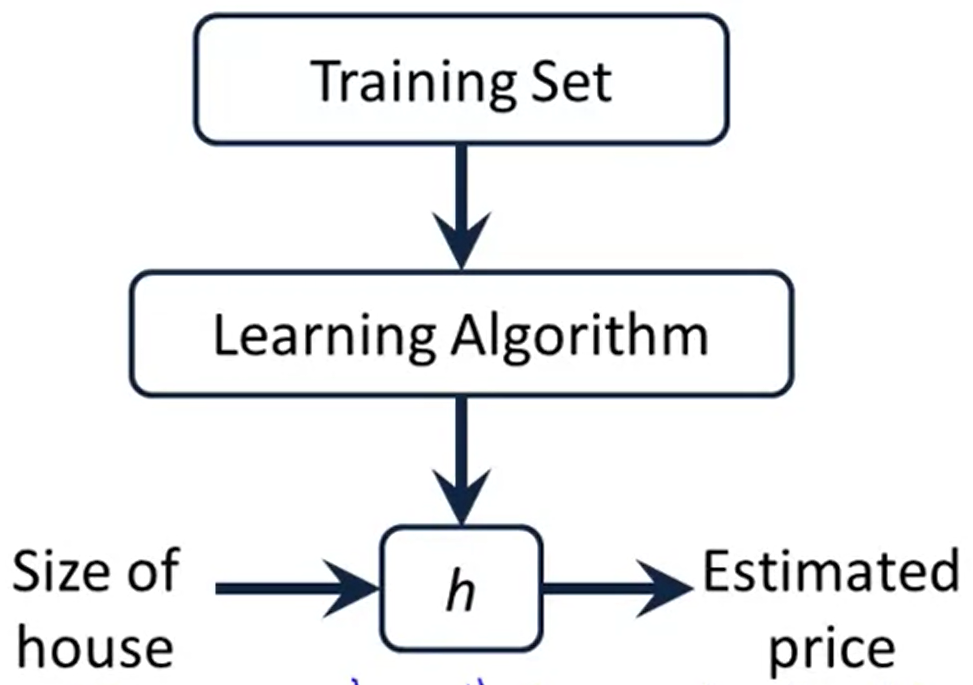

We start predicting the house prices by loading the houses.csv file which contains our dataset and by plotting the datapoints into a scatter plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from PIL import Image

In [2]:
%%html
<link rel="stylesheet" href="css/style.css">

In [3]:
houses = pd.read_csv('data/week1/houses.csv')
houses = houses.drop('Bedrooms', axis=1)
houses.head()

,Area,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


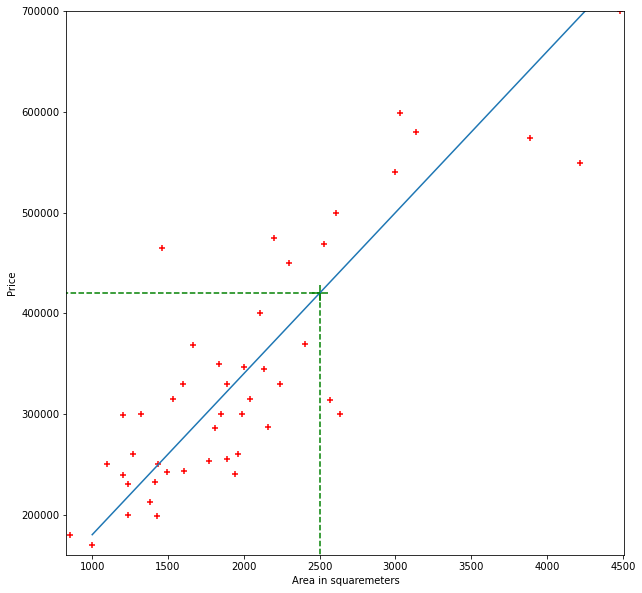

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(houses['Area'], houses['Price'], color='r', marker='+')
ax.set_xlabel('Area in squaremeters')
ax.set_xlim(830, 4510)
ax.set_ylabel('Price')
ax.set_ylim(160000, 700000)
plt.plot([1000,4500], [180000,740000], linestyle='solid')

#Predict the green value
ax.scatter([2500], [420000], color='g', marker='+', s=250)
plt.plot([2500,2500], [0,420000], linestyle='dashed', color='g')
plt.plot([0,2500], [420000,420000], linestyle='dashed', color='g')
plt.show()

When plotting our data, we can approximately see that there is a linear correlation between the **price** and the **area** of the house. The bigger the area, the higher the price.

If we want to know the price of a house for a given area, we can predict this price by finding the most accurate accurate line through our data-points. In the example below, I approximated this line in blue. This line will take the form $y = a + bx$ and if we know $a$ and $b$, we can approximate the price of a house by computing $y$.

In the example below, the plotted line is $y = 20,000 + 160x$ and therefore a house with an area of 2500 would cost approximately 420,000€ (green dashed line)

Before we get started with classification, we define some **notations**:

- m = Number of training examples
- x = "input" variable/feature
- y = "output" variable/"target" variable
- (x,y) = a single training example
- (x<sup>(i)</sup>,y<sup>(i)</sup>) = the i<sup>th</sup> training example

We write the hypothesis $h_\theta (x)$ (in the code cells, $h_\theta (x)$ will be call $\hat{y}(x)$) as shown in equation \ref{eq1}: <br>

\begin{align}
h_\theta (x) = \theta_0 + \theta_1 \cdot x + \dots \label{eq1}\tag{1}
\end{align}<br>

Our goal is to choose our $\theta_i$ parameters such that the hypothesis function $h_\theta (x)$ is close to $y$ in our training examples. To archive this, we need to define a **cost function** $J(\theta_0, \theta_1)$.

### <a name="cost_function"></a>Cost function

We define our cost function as a measure on how good our predictions are. If we settle on a set of $\theta$ parameters, we can compute our predictions $h_{\theta}(x)$ for the samples in our training set. Since we know the correct value, we can compute the error $e_i$ for each training sample as $e_{i} = h_{\theta}(x^(i)) - y^(i)$

Taking the average over all training samples gives us the average error. However, since the error can be both, positive and negative, we want make sure that they don't cancel each other out. We do this by squaring the errors. This results in our cost function:

\begin{align}
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(e_i)^2 = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta (x)-y)^2  \label{cost_function_1}\tag{2}
\end{align}<br>

Notice the $\frac{1}{2}$ that we added to the cost function. We did this since it makes the math a little bit easier as we will later take the derivative of our cost function which cancels out the $\frac{1}{2}$.

The cost function in this specific case is the **mean squared error (MSE)** function. While there are other functions, the MSE works reasonably well for regression problems and is one of the most used ones in linear regression. 

Our goal is to find parameters such that the cost function is minimised. This will optimise our hypothesis function and we can do that by setting the parameters such that: $\min_{\theta_0, \theta_1} J(\theta_0, \theta_1)$

### Visualising the cost function
Before we continue with our housing example, let's visualize the cost function along on a simplified example. For this example, we will set $\theta_0 = 0$. This means that all of our hypothesis functions will pass through the origin. 

Example:


| x | y |
|---|---|
| 1 | 1 |
| 2 | 2 |
| 3 | 3 |

For these three data-points we will see how our cost function behaves. Now obviously, these points lie on the function $y=x$ and if we plot this, our cost function will be $J(\theta)=0$. To visualise this, we will set $\theta_1 = 1$ and take a look at our predictions and the cost.

Text(0.5, 1.0, 'Cost function (of θ₁))')

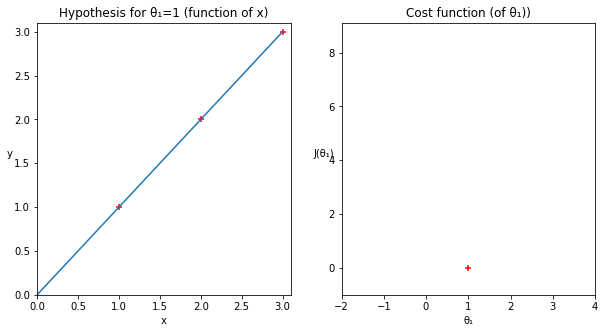

In [5]:
x = np.array([1,2,3])
y = np.array([1,2,3])

fig, (h, J) = plt.subplots(1, 2, figsize=(10,5))
h.scatter(x, y, color='r', marker='+')
h.set_xlabel('x')
h.set_xlim(0, 3.1)
h.set_ylabel('y', rotation=0)
h.set_ylim(0, 3.1)
h.plot([0,3], [0,3], linestyle='solid')
h.set_title("Hypothesis for \u03B8\u2081=1 (function of x)")

J.scatter([1], [0], color='r', marker='+')
J.set_xlabel('\u03B8\u2081')
J.set_xlim(-2, 4)
J.set_ylabel('J(\u03B8\u2081)', rotation=0)
J.set_ylim(-1, 9.1)
J.set_title("Cost function (of \u03B8\u2081))")

In [6]:
def mse(y,y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    return np.sum(np.square(y-y_hat))/(2*len(y))

In [7]:
class Variables(object):
    def __init__(self):
        self.x = np.array([1,2,3])
        self.y = np.array([1,2,3])
        self.cost = []
        self.theta = []

In [16]:
try:
    var = Variables()
    fig, (h, J) = plt.subplots(1, 2, figsize=(10,5))
    
    #Plot values for left graph (hypothesis function)
    line, = h.plot(x,y, lw=2)
    h.scatter(x, y, color='r', marker='+')
    h.set_xlabel('x')
    h.set_xlim(0, 3.1)
    h.set_ylabel('y', rotation=0)
    h.set_ylim(0, 3.1)
    h.set_title("Hypothesis for \u03B8\u2081=[0,2] (function of x)")

    #Plot values for right graph (cost function)
    scat = J.scatter([5], [5], color='r', marker='+')
    line1, = J.plot(x,y, lw=2)
    J.set_xlabel('\u03B8\u2081')
    J.set_xlim(-0.1, 2.1)
    J.set_ylabel('MSE')
    J.set_ylim(0, 3)
    J.set_title("Cost function (of \u03B8\u2081))")

    # initialization function: plot the background of each frame
    def init():
        return line,

    # animation function.  This is called sequentially
    def animate(i,var):
        #Compute new theta
        var.theta = np.append(var.theta, [0.01*i])
        #x array for propper line display
        x = np.array([0,1,2,3])
        #estimate h_theta
        y_hat = np.multiply(x, var.theta[-1])
        #Compute the mse from the predictions and append them to the costs
        error = mse(var.y,y_hat[1:])
        var.cost = np.append(var.cost, error)
        #Draw hypothesis function
        line.set_data(x, y_hat)
        #Display current cost as an x
        scat.set_offsets(np.c_[var.theta[-1], var.cost[-1]])
        #Draw cost function
        line1.set_data(var.theta, var.cost)
        return line,

    anim = animation.FuncAnimation(fig, animate, fargs=(var,), init_func=init,
                                   frames=201, interval=25, blit=True)

    plt.close(anim._fig)
 
    anim.save("data/week1/figures/mse_animation.gif", writer=animation.PillowWriter(fps=30))

    #display(HTML(anim.to_html5_video()))
    
except:
    print("Cannot load animation. Loading gif instead")
    display(HTML('<img src="data/week1/figures/mse_animation.gif">'))


Let's see what is happening in the animation above:
TODO: 
- Explain what is happening in the gif and give an example on computing the error for theta=0.5
- Our goal was to minimize J by means of theta1 and as we can see in the gif, that is happening for theta1=1
- The function is convex and has a global minimum. This is not always the case and we might get stuck. However, we can use this convexity to find the minimum